In [15]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize

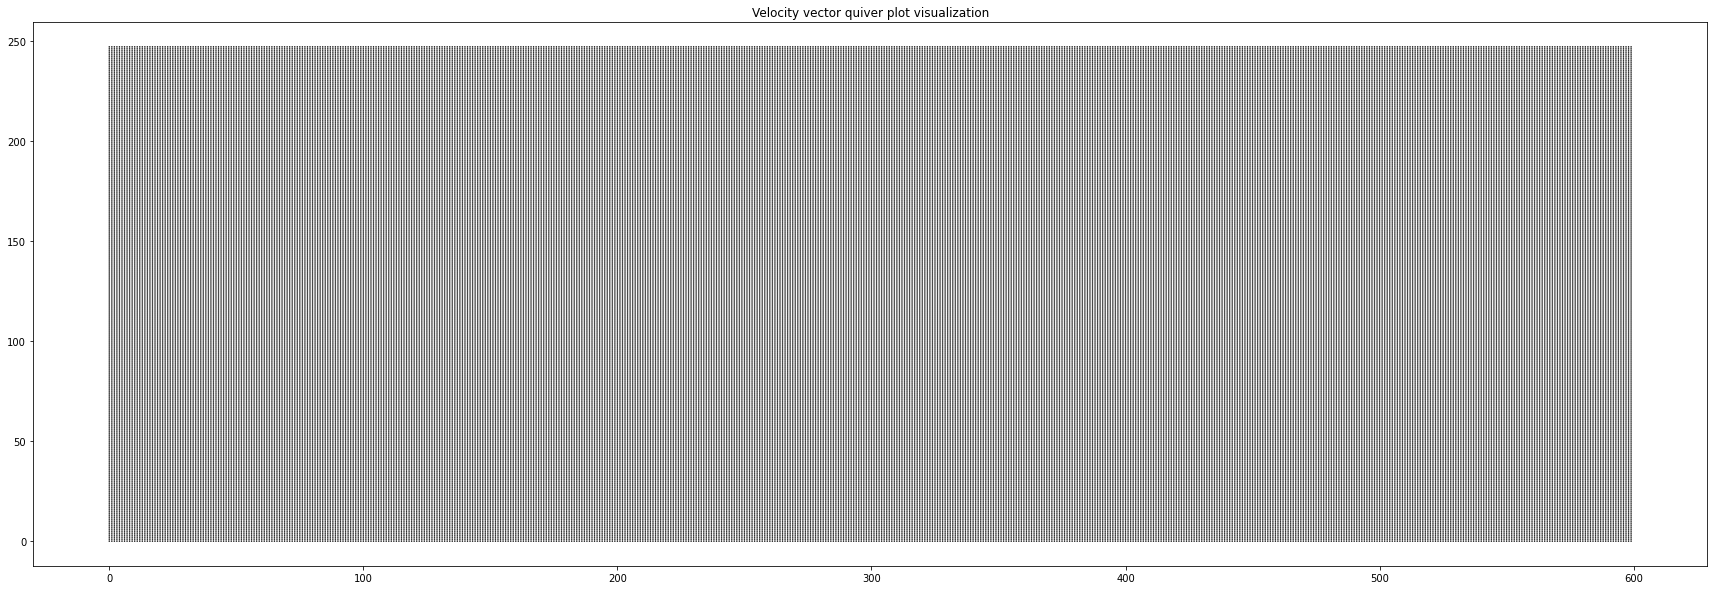

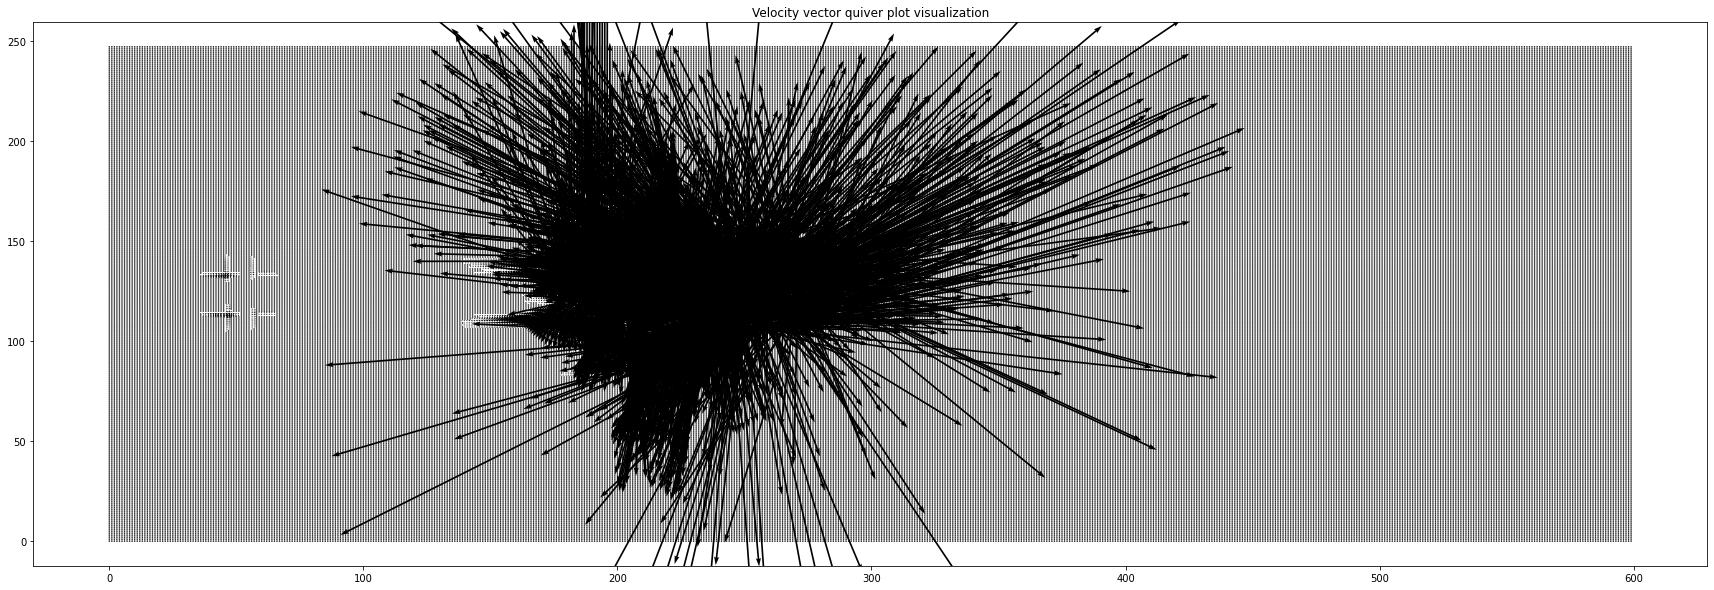

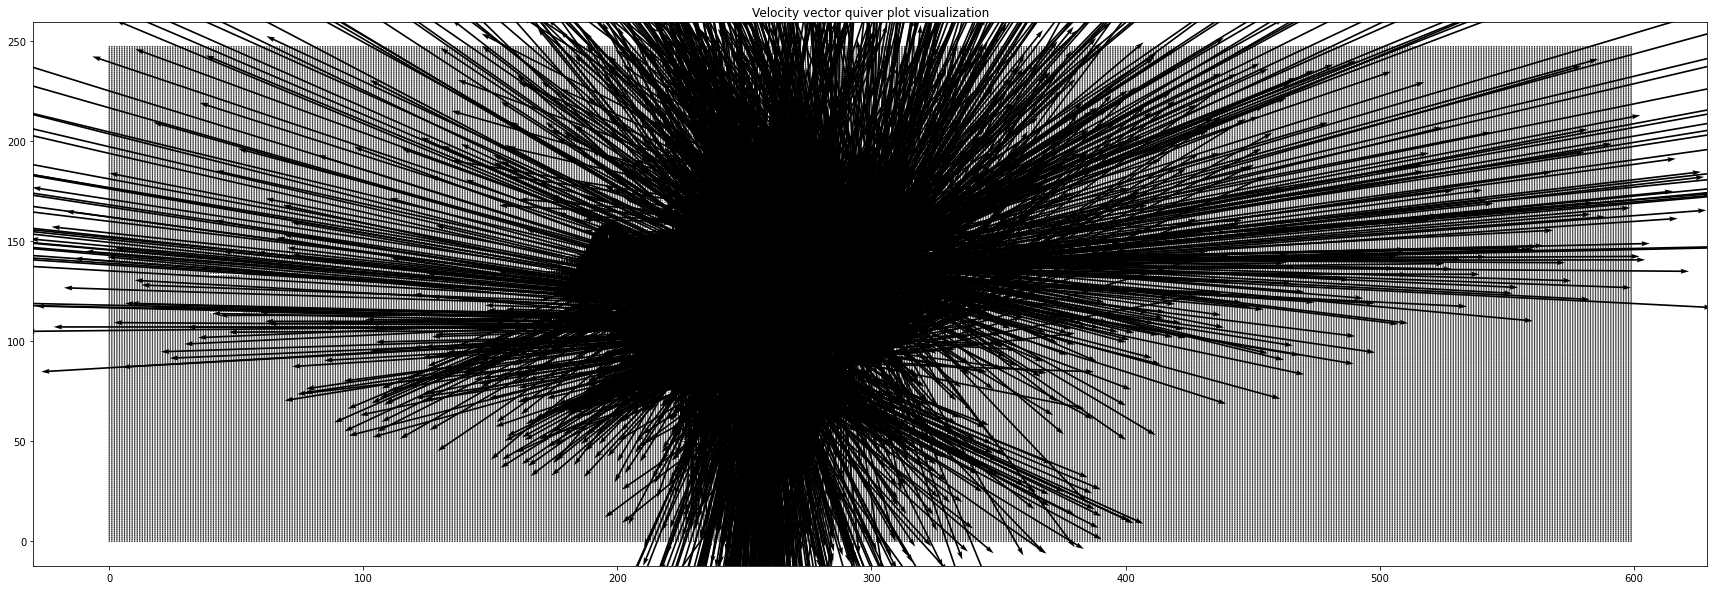

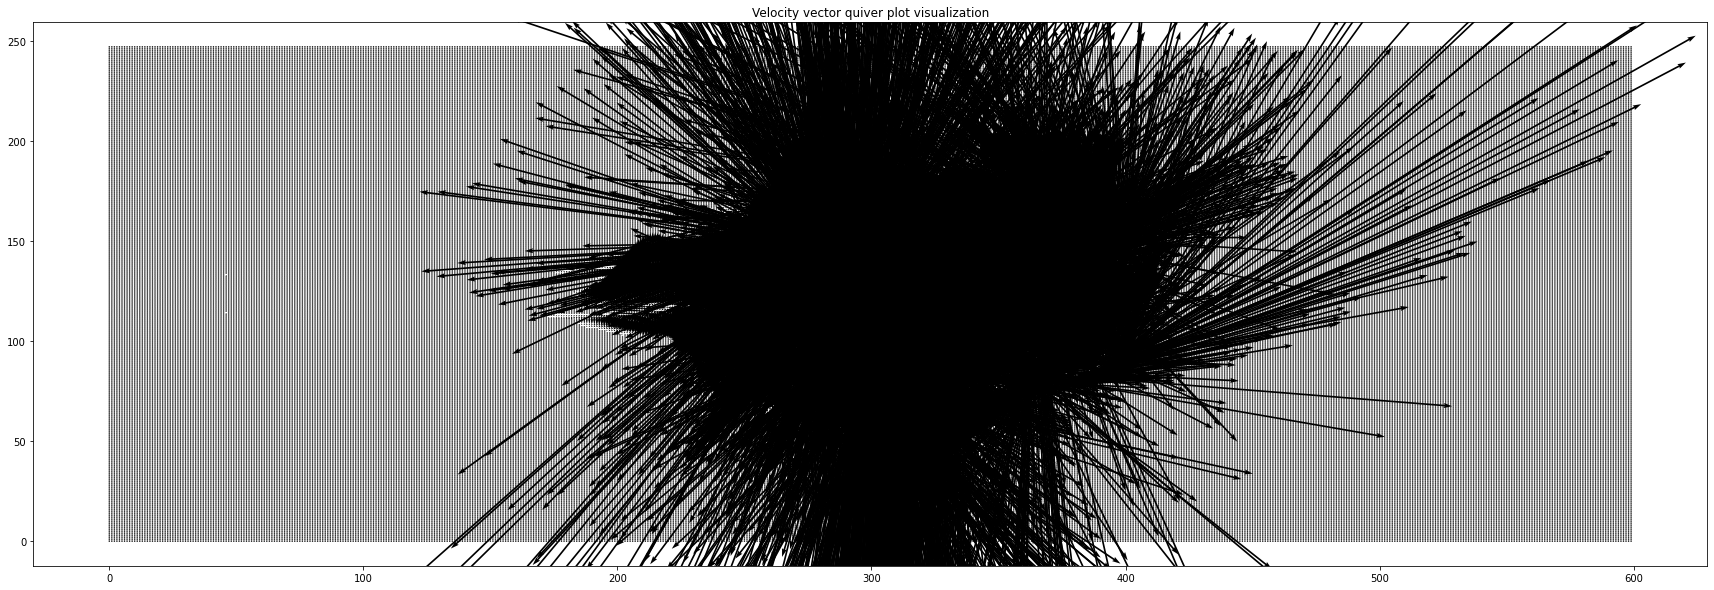

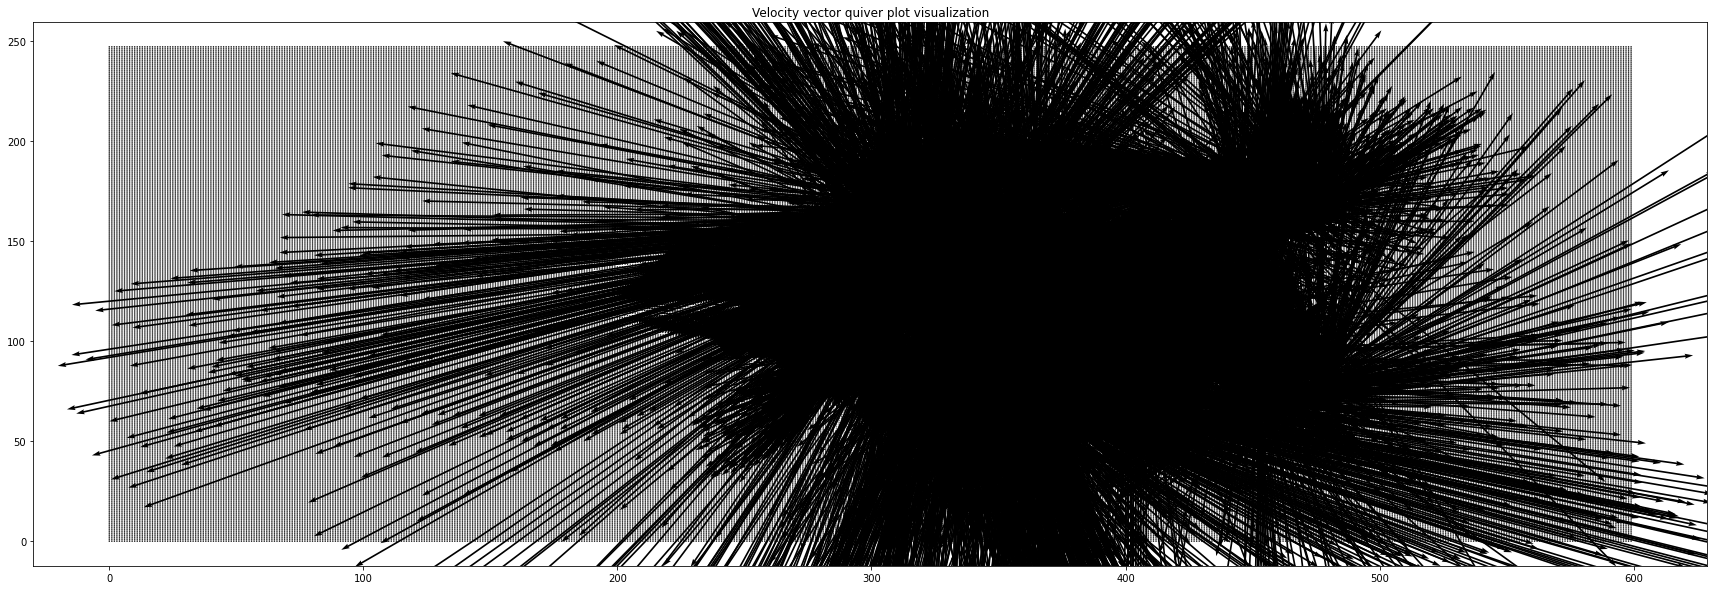

In [ ]:
#index_time_stamp=119
for i in range(200):

    time_stamp = str(i).zfill(4)
    
    file = '../input/dv-data-1/velocity.' + time_stamp + '.txt'
    
    if not os.path.isfile(file):
        continue
    
    #reading data
    data_file = pd.read_csv(file,delimiter=' ',header=None)
    data_file = np.array(data_file)
    
    #Initialize and define velocity vector
    velocity = np.zeros((600,248,248,3))
    
    temp1 = 0
    for k in range(248):
        for j in range (248):
            for x in range(600):
                velocity[x][j][k][2] = data_file[temp1][2]
                velocity[x][j][k][1] = data_file[temp1][1]
                velocity[x][j][k][0] = data_file[temp1][0]
                temp1 = temp1 +1
    
    #Utilizing velocity curl AS MOENTIONED ON WEBSITE
    velocity_curl = np.zeros((36902400, 3)) # 248*248*600 = 36902400
    
    temp2 = -1
    
    for k in range(248):
        for j in range(248):
            for x in range(600):
                temp2 = temp2 + 1
                if  x == 599 or j == 247 or k == 247 :
                    continue
                else:                    
                    velocity_curl[temp2][0] = ( velocity[x][j+1][k][2] - velocity[x][j][k][2] - velocity[x][j][k+1][1] + velocity[x][j][k][1] ) / 0.001
                    velocity_curl[temp2][1] = ( velocity[x][j][k+1][0] - velocity[x][j][k][0] - velocity[x+1][j][k][2] + velocity[x][j][k][2] ) / 0.001
                    velocity_curl[temp2][2] = ( velocity[x+1][j][k][1] - velocity[x][j][k][1] - velocity[x][j+1][k][0] + velocity[x][j][k][0] ) / 0.001
    
    #Using the below value as data available for it            
    z=124
    velocity_curl = velocity_curl [z*600*248 : (z+1)*600*248]

    curl_i = np.array(velocity_curl[:,0]).reshape(248,600)
    curl_j = np.array(velocity_curl[:,1]).reshape(248,600)
    curl_k = np.array(velocity_curl[:,2]).reshape(248,600)
    
    #plotting figure

    
    
    fig = plt.figure(figsize=(30,10))
    
    file = str(time_stamp).zfill(4)#As the file numbers in the data are in the form 0000 to 0199. 
    data_files = pd.read_csv('../input/data-vis/multifield.'+ file + '.zslice.txt', delimiter=' ',header=None)
    total_partical_density = data_files[0].values #Selecting first scalar value to visualize to be density
    temp = total_partical_density.reshape(248,600) #Keeping z constant and visualizing in X-Y Plane
    plt.contourf(temp, cmap='plasma')   
    plt.colorbar()
    plt.quiver(np.arange(600), np.arange(248), curl_i, curl_j, scale=10000.0 , scale_units='width', width=1e-3)
    plt.title("Velocity vector quiver plot visualization")
    
    file = time_stamp + '.jpg'
    plt.savefig(file)
    plt.show()
    


In [ ]:
grid = []

for i in range(200):

    time_stamp = str(i).zfill(4)
    file = time_stamp + '.jpg'
    if not os.path.isfile(file):
        continue
    
    img = Image.open(file)
    grid.append(img)
    
grid[0].save('vector.gif',format="GIF",append_images=grid[1:], save_all=True, duration=150, loop=0)